In [1]:
import pandas as pd

In [2]:
train1 = pd.read_csv('./amazon.csv')

In [3]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
list_a = ['product_name','discounted_price', 'actual_price','discount_percentage','rating','rating_count','about_product','review_title','review_content']
train1_list = train1.loc[:, list_a]
train1_list.head()
#제품이름, 제품의 할인된 가격, 제품의 실제 가격, 제품의 할인율, 소비자가 평가한 점수, 평가에 투표한 사람 수, 제품에 대한 설명, 짧은 리뷰, 긴리뷰

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


데이터 형태 바꾸기

In [5]:
train1_list['discounted_price'] = train1_list['discounted_price'].str.replace("₹",'')
train1_list['discounted_price'] = train1_list['discounted_price'].str.replace(",",'')
train1_list['discounted_price'] = train1_list['discounted_price'].astype('float64')
#제품의 할인된 가격 데이터들의 단위와 콤마를 지우고 실수형으로 바꿔줍니다

In [6]:
train1_list['actual_price'] = train1_list['actual_price'].str.replace("₹",'')
train1_list['actual_price'] = train1_list['actual_price'].str.replace(",",'')
train1_list['actual_price'] = train1_list['actual_price'].astype('float64')
#마찬가지로 제품의 실제 가격 데이터들의 단위와 콤마를 지우고 실수형으로 바꿔줍니다

In [7]:
train1_list['discount_percentage'] = train1_list['discount_percentage'].str.replace('%','').astype('float64')
#제품의 할인율 데이터들의 퍼센트를 지우고 실수형으로 바꿔줍니다

In [8]:
train1_list['rating'].value_counts()
#에러를 확인하기 위해 값들이 뭐가 있는지 확인하는데 이상치가 있는 것이 확인됩니다

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [9]:
train1_list.drop(train1_list.loc[train1_list['rating']=='|'].index, inplace=True)
#소비자가 평가한 점수 데이터에 이상치가 있는 행을 지워 해결합니다

In [10]:
train1_list['rating']=train1_list['rating'].astype('float64')
#다시 소비자가 평가한 점수 데이터들을 실수형으로 바꿔줍니다

In [11]:
train1_list['rating_count'] = train1_list['rating_count'].str.replace(',', '').astype('float64')
#평가에 투표한 사람 수 데이터들의 콤마를 지우고 실수형으로 바꿔줍니다

등급설정

In [12]:
train1_list.loc[train1_list['rating'] >= 4.3, 'new_rating'] = 'A'
train1_list.loc[(train1_list['rating'] >= 4.1) & (train1_list['rating'] < 4.3), 'new_rating'] = 'B'
train1_list.loc[train1_list['rating'] <= 4.0, 'new_rating'] = 'C'

In [13]:
train1_list['rating_count'].isnull().sum()

2

In [14]:
train1_list=train1_list.dropna()

In [15]:
train1_list['discount_percentage'] = train1_list['discount_percentage']/100
#할인율은 퍼센트이기때문에 100 나눠준다

텍스트데이터전처리

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hk679\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
train1_list['review_title']=train1_list['review_title'].str.replace('[^\w\s]','')
train1_list['review_content']=train1_list['review_content'].str.replace('[^\w\s]','')
#특수문자 제거

C:\Users\hk679\AppData\Local\Temp\ipykernel_18412\3695781049.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train1_list['review_title']=train1_list['review_title'].str.replace('[^\w\s]','')
C:\Users\hk679\AppData\Local\Temp\ipykernel_18412\3695781049.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train1_list['review_content']=train1_list['review_content'].str.replace('[^\w\s]','')


In [25]:
train1_list['new_review']=train1_list['review_title']+' '+train1_list['review_content']

In [26]:
import wordcloud
import matplotlib.pyplot as plt
#전체워드클라우드

In [27]:
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(train1_list['new_review']))

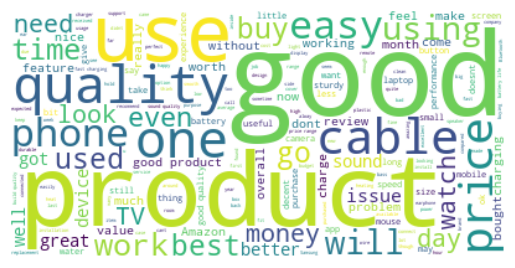

In [28]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A등급 워드클라우드

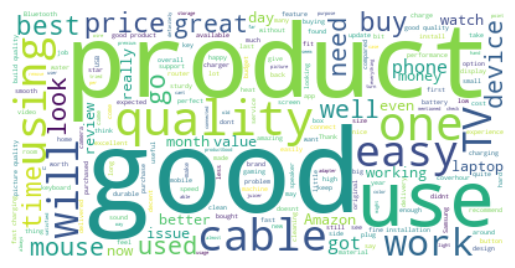

In [29]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_A = train1_list[train1_list['new_rating'] == 'A']

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_A['new_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

B등급 워드클라우드

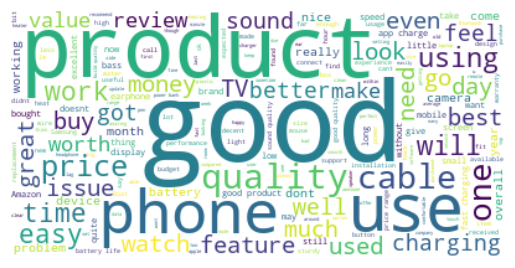

In [30]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_B = train1_list[train1_list['new_rating'] == 'B']

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_B['new_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C등급 워드클라우드

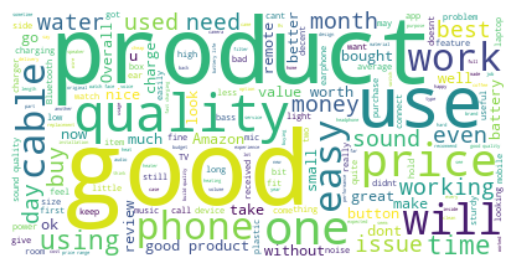

In [31]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_C = train1_list[train1_list['new_rating'] == 'C']

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_C['new_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

위에 뉴리뷰에대한 뉴평점등급 분류모델

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hk679\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train1_list['new_review'])

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, train1_list['new_rating'], test_size=0.3, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [38]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.48519362186788156


k-nn

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5034168564920274


텍스트 데이터 더 가공시키기

In [39]:
stop_words = set(stopwords.words('english'))

In [40]:
def preprocess(text):
    # 문장부호(punctuation) 제거
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # 소문자 변환
    text = text.lower()
    
    # 토큰화(tokenization)
    tokens = word_tokenize(text)
    
    # 불용어(stopwords) 제거
    tokens = [token for token in tokens if not token in stop_words]
    
    # 토큰 재결합
    text = " ".join(tokens)
    
    return text

In [41]:
train1_list['processed_review'] = train1_list['new_review'].apply(preprocess)

In [42]:
train1_list['processed_review']

0       satisfiedcharging really fastvalue moneyproduc...
1       good braided cable type c devicegood quality p...
2       good speed earlier versionsgood productworking...
3       good productgood onenicereally nice productver...
4       good originaldecentgood one secondary usebest ...
                              ...                        
1460    received product without spannerexcellent prod...
1461    okeverything good couldnt return bcoz needed e...
1462    goodwork front melt 2 monthgood oneit durabler...
1463    fan speed slowgood qualitygood productgoodold ...
1464    works perfectok good productnice product recom...
Name: processed_review, Length: 1462, dtype: object

가공된 워드클라우드

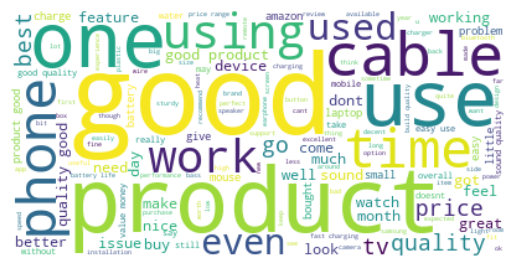

In [43]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(train1_list['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A등급 가공된 워드클라우드

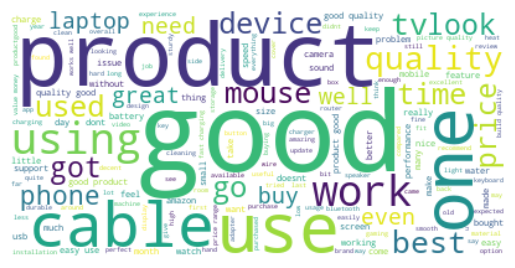

In [44]:

import wordcloud
import matplotlib.pyplot as plt

new_rating_A = train1_list[train1_list['new_rating'] == 'A']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_A['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


B등급 가공된 워드클라우드

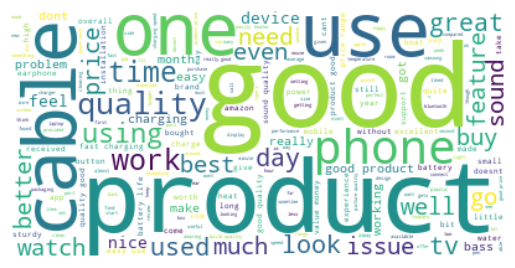

In [45]:
import wordcloud
import matplotlib.pyplot as plt


new_rating_B = train1_list[train1_list['new_rating'] == 'B']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_B['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C등급 가공된 워드클라우드

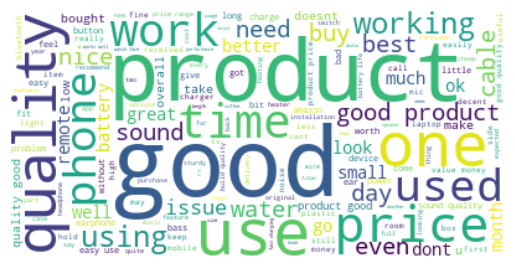

In [46]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_C = train1_list[train1_list['new_rating'] == 'C']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_C['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

위에 가공된리뷰에대한 뉴평점등급 분류모델

In [52]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train1_list['processed_review'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, train1_list['new_rating'], test_size=0.3, random_state=42)

In [54]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [55]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5444191343963554


k-nn

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = knn.predict(X_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.510250569476082


A,B,C등급에 공통적으로 많이 들어간 단어 제거하기

In [59]:
stop_words.update(['product', 'good'])

In [60]:
train1_list['processed_review'] = train1_list['new_review'].apply(preprocess)

가공되고 반복단어 지워진 워드클라우드

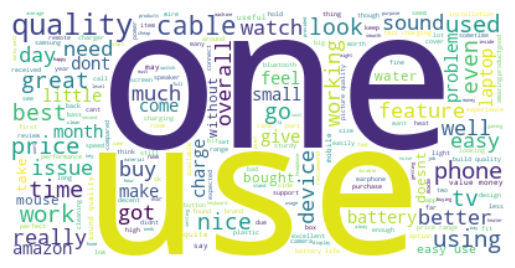

In [61]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(train1_list['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A등급 가공되고 반복단어 지워진 워드클라우드

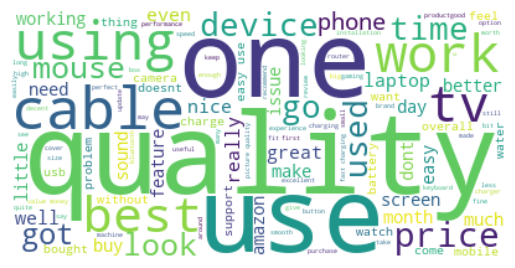

In [62]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_A = train1_list[train1_list['new_rating'] == 'A']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_A['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


B등급 가공되고 반복단어 지워진 워드클라우드

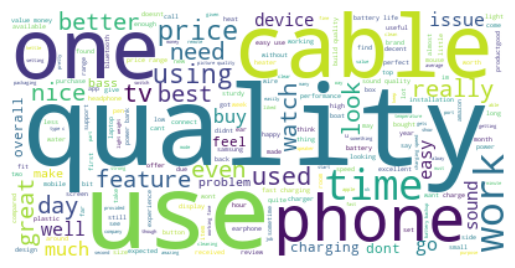

In [63]:
import wordcloud
import matplotlib.pyplot as plt


new_rating_B = train1_list[train1_list['new_rating'] == 'B']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_B['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C등급 가공되고 반복단어 지워진 워드클라우드

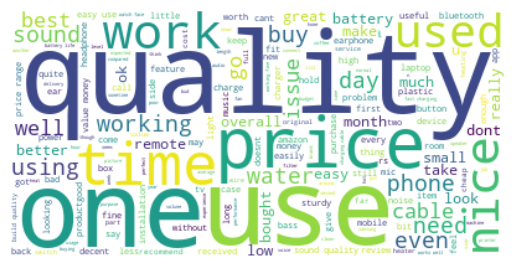

In [65]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_C = train1_list[train1_list['new_rating'] == 'C']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_C['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

위에 가공되고 반복단어 지워진 것에대한 뉴평점등급 분류모델

In [66]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train1_list['processed_review'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, train1_list['new_rating'], test_size=0.3, random_state=42)

In [68]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [69]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5489749430523918


k-nn

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pred = knn.predict(X_test)

In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5148063781321185


의미없어 보이고 많이 나오는 단어도 지우기

In [73]:
stop_words.update(['product', 'good','quality','use','one'])

In [74]:
train1_list['processed_review'] = train1_list['new_review'].apply(preprocess)

가공되고 반복단어, 의미없는 단어 지운 워드클라우드

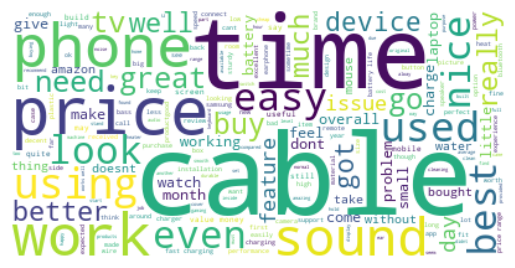

In [75]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(train1_list['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A등급

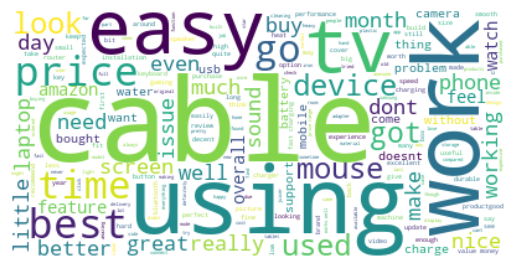

In [76]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_A = train1_list[train1_list['new_rating'] == 'A']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_A['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


B등급

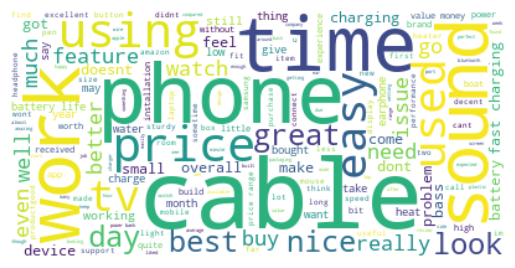

In [77]:
import wordcloud
import matplotlib.pyplot as plt


new_rating_B = train1_list[train1_list['new_rating'] == 'B']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_B['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C등급

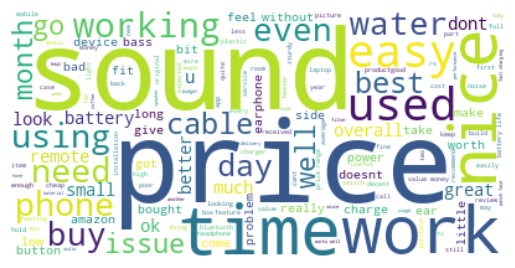

In [78]:
import wordcloud
import matplotlib.pyplot as plt

new_rating_C = train1_list[train1_list['new_rating'] == 'C']
wordcloud = wordcloud.WordCloud(background_color='white').generate(' '.join(new_rating_C['processed_review']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train1_list['processed_review'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, train1_list['new_rating'], test_size=0.3, random_state=42)

In [81]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [82]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5466970387243736


In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = knn.predict(X_test)

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5056947608200456
